In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [6]:
df = pd.read_csv('dataset3.0.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns = ['video_id'])
df = df.drop(columns = ['daily_view_classification'])
df = df.drop(columns = ['daily_likes_normal'])
df = df.drop(columns = ['daily_dislikes_normal'])
df = df.drop(columns = ['daily_comment_count_normal'])
df = df.drop(columns = ['category_of_title_length'])
df = df.drop(columns = ['tags_length_category'])
df = df.drop(columns = ['stop_words_count_title_normal'])
df = df.drop(columns = ['sub_date'])

y = df.daily_views.values
y = np.log(y+1)
X = df.drop(columns = ['daily_views'])
X = X.values

In [53]:
#offset = int(X.shape[0] * 0.9)
#X = X.astype(np.float32)
#X_train, y_train = X[:offset], y[:offset]
#X_test, y_test = X[offset:], y[offset:]

In [7]:
params = {'n_estimators': 700, 'max_depth': 5,'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)
cv_results = cross_validate(clf, X, y, cv=10,scoring='r2',return_train_score=False)
cv_results['test_score']

array([ 0.29715378,  0.26882058,  0.18866227,  0.25616585,  0.17045311,
        0.22534396,  0.12527978,  0.15001051,  0.0986655 , -0.14071571])

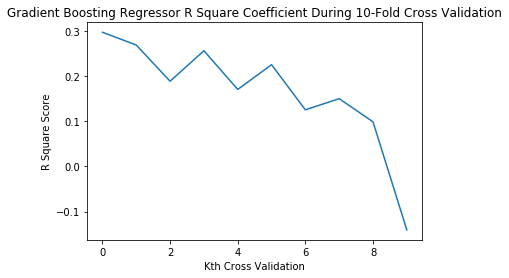

In [9]:
fig = plt.figure()
plt.plot(cv_results['test_score'])
plt.xlabel('Kth Cross Validation')
plt.ylabel('R Square Score')
plt.title('Gradient Boosting Regressor R Square Coefficient During 10-Fold Cross Validation')
plt.show()
fig.savefig('Gradient_Boosting_R^2.png',bbox_inches='tight')

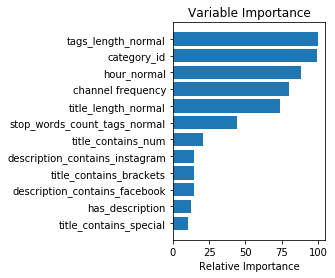

In [8]:
# Plot feature importance
clf.fit(X, y)
X = df.drop(columns = ['daily_views'])
y = df.daily_views
fig = plt.figure()
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
fig.savefig('Gradient_Boost.png',bbox_inches='tight')

Text(0,0.5,'Deviance')

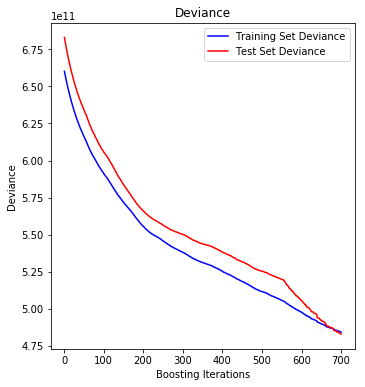

In [55]:
#test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

#for i, y_pred in enumerate(clf.staged_predict(X_test)):
    #test_score[i] = clf.loss_(y_test, y_pred)

#plt.figure(figsize=(12, 6))
#plt.subplot(1, 2, 1)
#plt.title('Deviance')
#plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
#plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         #label='Test Set Deviance')
#plt.legend(loc='upper right')
#plt.xlabel('Boosting Iterations')
#plt.ylabel('Deviance')

In [58]:
len(X.columns)

14

In [10]:
clf.score(X,y)

-0.15008447768003874